In [27]:
!pip install shap
!pip install eli5
!pip install lime
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
import eli5
from eli5.sklearn import PermutationImportance
import lime
import lime.lime_tabular


In [28]:
!pip install nbconvert

In [29]:
# Load the data
df = pd.read_excel("/content/MHD_Extended_Corrected_366_Final.xlsx")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       112 non-null    float64
 1   Funding levels                             306 non-null    float64
 2   staffing levels                            365 non-null    object 
 3   Patient outcome                            365 non-null    object 
 4   Emergency referall                         365 non-null    float64
 5   Discharges                                 138 non-null    float64
 6   Associated emergency readmissions          138 non-null    float64
 7   Urgent crisis referalls                    365 non-null    float64
 8   Access_to_care_waiting_time                204 non-null    float64
 9   Geographic                                 366 non-null    object 
 10  Geographic-1              

,Year,Funding levels,Emergency referall,Discharges,Associated emergency readmissions,Urgent crisis referalls,Access_to_care_waiting_time,Age,Indicator_value_Policy_changes,Mental Health Training Programs,Population Density,Socioeconomic Status Index,Prevalence of Mental Health Conditions,Public Health Spending per Capita,Number of Mental Health Facilities,Average Waiting Time for Treatment,Patient to Professional Ratio,Rate of Mental Health Service Utilization,Community Support Programs
count,112.000000,306.000000,365.000000,138.000000,138.000000,365.000000,204.000000,34.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1971.232143,7.605968,110.172603,22586.623188,849.449275,1370.506849,32.524510,31.970588,7.076503,4.669399,2573.491803,0.496343,2757.054645,289.031272,10.300546,45.456284,522.904372,0.569686,25.079235
std,29.181934,5.392744,562.990978,11606.772253,466.042683,7063.060410,29.434312,15.727770,4.989814,2.716261,1431.455308,0.298779,1314.872895,110.000168,5.556913,25.858032,277.378312,0.260453,13.901877
min,1923.000000,0.000000,0.000000,7225.000000,151.000000,0.000000,0.000000,8.000000,0.000000,1.000000,117.000000,0.001812,511.000000,101.743832,1.000000,0.000000,52.000000,0.100167,1.000000
25%,1945.750000,4.000000,0.000000,13923.750000,511.250000,0.000000,15.000000,18.000000,4.000000,2.000000,1291.250000,0.240454,1617.250000,195.369082,5.000000,24.250000,286.250000,0.360499,14.000000
50%,1970.500000,6.000000,0.000000,19357.500000,782.500000,110.000000,25.000000,34.000000,6.000000,4.000000,2621.500000,0.480108,2846.000000,291.481325,10.500000,47.000000,518.000000,0.593076,24.500000
75%,1996.250000,10.000000,20.000000,28690.000000,1012.500000,380.000000,44.000000,42.750000,8.000000,7.000000,3786.750000,0.760528,3864.500000,374.691758,15.000000,67.750000,769.750000,0.787973,37.000000
max,2022.000000,29.000000,4865.000000,72225.000000,3155.000000,59414.000000,165.000000,65.000000,29.000000,9.000000,4988.000000,0.999741,4994.000000,498.405113,19.000000,89.000000,998.000000,0.996805,49.000000


In [30]:
# Preprocessing
# Drop columns not relevant for training
df = df.drop(columns=['Gender', 'Age'])

In [31]:
# Handle missing values
df = df.dropna()

In [32]:
# Convert all categorical variables to strings
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)

In [33]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [34]:
# Split data into features and target variable
X = df.drop(columns=['Patient outcome'])
y = df['Patient outcome']

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train Support Vector Regression (SVR) model
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [37]:
# Compute SHAP values for SVR
svr_explainer = shap.KernelExplainer(svr_model.predict, X_train)
svr_shap_values = svr_explainer.shap_values(X_test)
print(svr_shap_values)

  0%|          | 0/23 [00:00<?, ?it/s]

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.98302387e-03
  -5.12176794e-01 -2.33011770e-03 -6.50396249e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -7.43946234e-03  0.00000000e+00
  -7.24964994e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.30294394e-04  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.32699525e-03
   5.35770447e-02  1.68404785e-03 -6.43765023e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.19362337e-02  0.00000000e+00
  -6.16725599e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.43406039e-04  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.15969704e-03
   9.24647429e-01  8.21233886e-03 -8.99615119e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.181

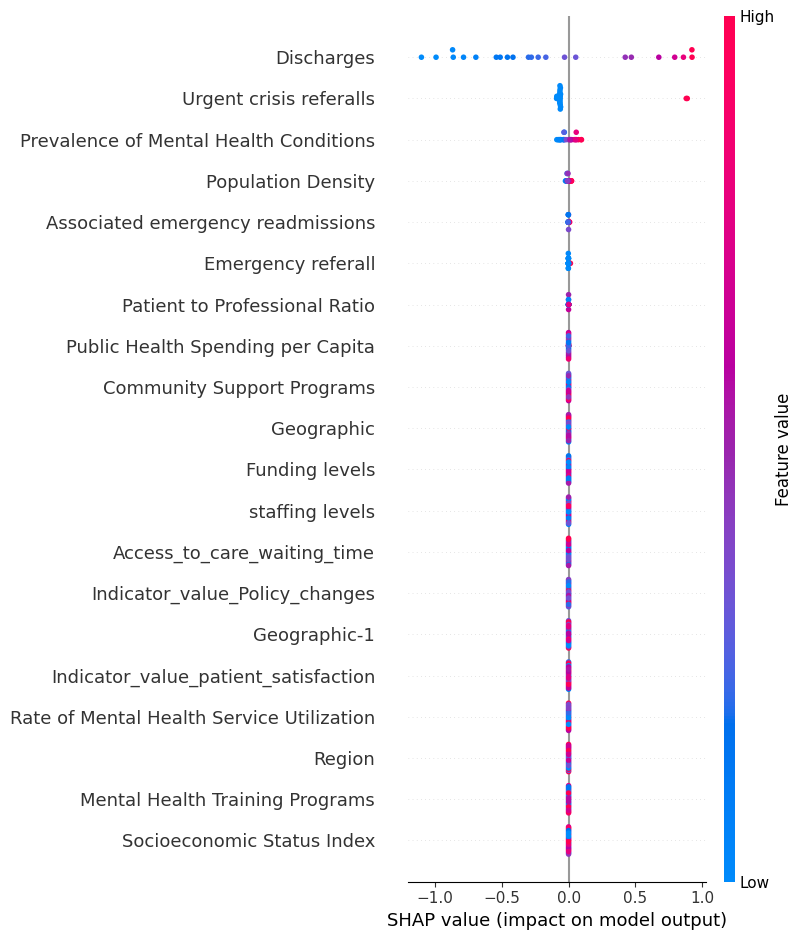

In [38]:
# Visualize SHAP values for SVR
shap.summary_plot(svr_shap_values, X_test)

In [39]:
# Train Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [40]:
# Compute SHAP values for Ridge Regression
ridge_explainer = shap.KernelExplainer(ridge_model.predict, X_train)
ridge_shap_values = ridge_explainer.shap_values(X_test)

  0%|          | 0/23 [00:00<?, ?it/s]

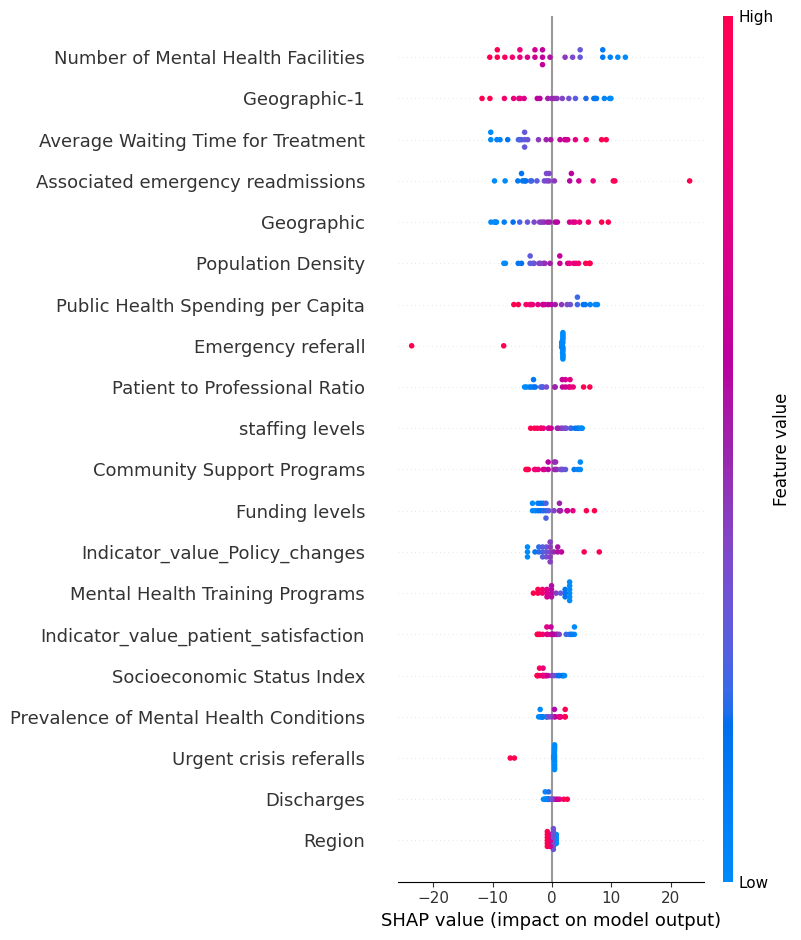

In [41]:
# Visualize SHAP values for Ridge Regression
shap.summary_plot(ridge_shap_values, X_test)

In [42]:
# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

SVR()

In [43]:
# Train Ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [44]:
# Define a wrapper function for the SVR model
def svr_predict(X):
    return svr_model.predict(X)

In [45]:
# Calculate SHAP values for SVR model
explainer_svr = shap.Explainer(svr_predict, X_train)
shap_values_svr = explainer_svr(X_test)

In [46]:
# Calculate SHAP values for Ridge regression model
explainer_ridge = shap.Explainer(ridge_model, X_train)
shap_values_ridge = explainer_ridge(X_test)

In [47]:
# Calculate mean absolute SHAP values for SVR model
mean_abs_shap_svr = np.mean(np.abs(shap_values_svr.values), axis=0)

In [48]:
# Calculate mean absolute SHAP values for Ridge regression model
mean_abs_shap_ridge = np.mean(np.abs(shap_values_ridge.values), axis=0)

In [49]:
# Display mean absolute SHAP values for each feature
feature_names = X.columns
print("Mean Absolute SHAP Values for SVR Model:")
for feature, shap_value in zip(feature_names, mean_abs_shap_svr):
    print(f"{feature}: {shap_value:.4f}")

Mean Absolute SHAP Values for SVR Model:
Year: 0.0000
Funding levels: 0.0000
staffing levels: 0.0000
Emergency referall: 0.0019
Discharges: 0.5814
Associated emergency readmissions: 0.0021
Urgent crisis referalls: 0.1391
Access_to_care_waiting_time: 0.0000
Geographic: 0.0000
Geographic-1: 0.0000
Indicator_value_patient_satisfaction: 0.0000
Indicator_value_Policy_changes: 0.0000
Region: 0.0000
Mental Health Training Programs: 0.0000
Population Density: 0.0116
Socioeconomic Status Index: 0.0000
Prevalence of Mental Health Conditions: 0.0497
Public Health Spending per Capita: 0.0001
Number of Mental Health Facilities: 0.0000
Average Waiting Time for Treatment: 0.0000
Patient to Professional Ratio: 0.0006
Rate of Mental Health Service Utilization: 0.0000
Community Support Programs: 0.0000


In [50]:
print("\nMean Absolute SHAP Values for Ridge Regression Model:")
for feature, shap_value in zip(feature_names, mean_abs_shap_ridge):
    print(f"{feature}: {shap_value:.4f}")


Mean Absolute SHAP Values for Ridge Regression Model:
Year: 0.4146
Funding levels: 2.2514
staffing levels: 2.5716
Emergency referall: 3.0174
Discharges: 0.8853
Associated emergency readmissions: 5.1458
Urgent crisis referalls: 0.9551
Access_to_care_waiting_time: 0.4700
Geographic: 4.9080
Geographic-1: 5.3702
Indicator_value_patient_satisfaction: 1.5912
Indicator_value_Policy_changes: 2.0031
Region: 0.4737
Mental Health Training Programs: 1.7641
Population Density: 3.7508
Socioeconomic Status Index: 1.4825
Prevalence of Mental Health Conditions: 1.3463
Public Health Spending per Capita: 3.6108
Number of Mental Health Facilities: 5.8698
Average Waiting Time for Treatment: 5.1958
Patient to Professional Ratio: 2.8067
Rate of Mental Health Service Utilization: 0.0518
Community Support Programs: 2.2737


In [52]:
# Utilize ELI5 for model interpretation
perm = PermutationImportance(ridge_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=None)


Weight,Feature
0.2344 ± 0.1889,Number of Mental Health Facilities
0.1321 ± 0.2633,Geographic
0.0635 ± 0.0525,Patient to Professional Ratio
0.0504 ± 0.0873,Indicator_value_Policy_changes
0.0474 ± 0.0687,Funding levels
0.0420 ± 0.0800,staffing levels
0.0405 ± 0.0928,Mental Health Training Programs
0.0390 ± 0.1947,Emergency referall
0.0341 ± 0.0965,Community Support Programs
0.0302 ± 0.0147,Indicator_value_patient_satisfaction
